# Importaciones de bibliotecas
En este fragmento de código, se importan varias bibliotecas esenciales para el análisis de datos y la visualización en Python:

- `pandas`: Utilizada para la manipulación y análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
- `numpy`: Aporta soporte para arrays y matrices grandes y multidimensionales, junto con una colección de funciones matemáticas para operar con estas estructuras de datos.
- `matplotlib.pyplot`: Proporciona una manera de visualizar datos. Se usa comúnmente para crear gráficos y visualizaciones estáticas, animadas e interactivas.
- `seaborn`: Basada en matplotlib, esta biblioteca proporciona una interfaz de alto nivel para la creación de gráficos estadísticos atractivos y más complejos de forma más sencilla.
- `scipy.stats.kstest`: Se utiliza para realizar la prueba de Kolmogorov-Smirnov, un test para comparar una muestra con una distribución de referencia o comparar dos muestras entre sí.
- `scipy.stats.mannwhitneyu`: Utilizada para realizar la prueba U de Mann-Whitney, una prueba no paramétrica para evaluar si dos muestras independientes provienen de la misma distribución.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import roc_curve, auc, confusion_matrix
from scipy.stats import kstest
from scipy.stats import mannwhitneyu

## Cálculo de resultados de todos los experimentos

Se ha hecho un test con el mismo dataset de evaluación para todos los modelos, el siguiente código cálcula métricas como precision, accuracy, recall para cada experimento y devuelve un dataframe con el resumen de las pruebas

In [2]:

path = '../experiments/results/planck'
# Crear un DataFrame vacío con las columnas deseadas
data = pd.DataFrame(columns=['experiment', 'model_id', 'precision', 'recall', 'accuracy', 'TP', 'TN', 'FP', 'FN'])

# Leer todos los CSV y concatenarlos en un único DataFrame
files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]
dfs = []
for f in files:
    df = pd.read_csv(f,sep = ';')
    df = df.iloc[0:1373]
    df['experiment'] = 3
    df['model_id'] = os.path.basename(f)  # Usar basename para obtener solo el nombre del archivo
    dfs.append(df)

if dfs:  # Comprobar si hay DataFrames para concatenar
    combined = pd.concat(dfs, ignore_index=True)
    combined['media'] = combined['media'].str.strip('[]').astype(float)
    combined['std'] = combined['std'].str.strip('[]').astype(float)
    combined['true_value'] = np.where(combined['filename'].str.contains('foto'), 0, 1)
    combined['pred_value'] = np.where(combined['media'] > 0.5, 1, 0)

    # Asignar TP, FP, TN, FN basado en 'true_value' y 'pred_value'
    conditions = [
        (combined['true_value'] == 1) & (combined['pred_value'] == 1),
        (combined['true_value'] == 1) & (combined['pred_value'] == 0),
        (combined['true_value'] == 0) & (combined['pred_value'] == 1),
        (combined['true_value'] == 0) & (combined['pred_value'] == 0)
    ]
    choices = ['TP', 'FN', 'FP', 'TN']
    combined['pred_type'] = np.select(conditions, choices)

    # Calcular conteos para TP, TN, FP, FN
    summary = combined.pivot_table(index=['experiment', 'model_id'], columns='pred_type', aggfunc='size', fill_value=0)

    # Calcular métricas
    summary['precision'] = summary['TP'] / (summary['TP'] + summary['FP'])
    summary['recall'] = summary['TP'] / (summary['TP'] + summary['FN'])
    summary['accuracy'] = (summary['TP'] + summary['TN']) / summary[['TP', 'TN', 'FP', 'FN']].sum(axis=1)

    # Combinar los resultados de nuevo en 'data'
    data = pd.concat([data, summary.reset_index()], ignore_index=True, sort=False)

# Guardar o procesar más según sea necesario
data


/tmp/ipykernel_1537/3879246571.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, summary.reset_index()], ignore_index=True, sort=False)


,experiment,model_id,precision,recall,accuracy,TP,TN,FP,FN
0,3,CNN2003_large_1.h5.csv,0.793737,0.993243,0.852853,735,401,191,5
1,3,CNN2503_large_1.h5.csv,0.796276,0.982432,0.850601,727,406,186,13
2,3,MCD0704_medium_2.h5.csv,0.777306,0.990541,0.837087,733,382,210,7
3,3,MCD0904_medium_3.h5.csv,0.798475,0.990541,0.855856,733,407,185,7
4,3,MCD1004_medium_4.h5.csv,0.612732,0.936486,0.635886,693,154,438,47
5,3,MCD1004_medium_5.h5.csv,0.750507,1.000000,0.815315,740,346,246,0
6,3,MCD1004_medium_7.h5.csv,0.772727,0.987838,0.831832,731,377,215,9
7,3,MCD1504_medium_8.h5.csv,0.983539,0.968919,0.973724,717,580,12,23
8,3,MCD2004_large_10.h5.csv,0.925272,0.920270,0.914414,681,537,55,59
9,3,MCD2004_large_11.h5.csv,0.787913,0.933784,0.823574,691,406,186,49


In [54]:
data  = data.sort_values(by = 'accuracy',ascending = False)

In [55]:
data.to_csv('../data/experiments1205.csv',sep = ';',index = False)

## Análisis del modelo final

En esta sección se analiza en detalle el rendimeinto del modelo final, tanto a nivel de precisión como de medición de la incertidumbre

In [3]:
data = pd.read_csv('../experiments/results/final_model/resultados_modelo_final.csv',sep = ';')

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/results/final_model/resultados_modelo_final.csv'

## Tratamiento de datos

Los resultados se exportan de tal manera que la media y la std aparecen como strings al cargar el csv, por lo que se les vuelve a dar el valor de float

In [6]:
data['media'] = data['media'].str.replace('[', '')
data['media'] = data['media'].str.replace(']', '')
data['std'] = data['std'].str.replace('[', '')
data['std'] = data['std'].str.replace(']', '')

In [7]:
data['media'] = data['media'].apply(lambda x: float(x))
data['std'] = data['std'].apply(lambda x: float(x))

## Etiquetado de predicciones

Le asignamos a cada predicción su tipo:

- TP: verdadero positivo
- TN: verdadero negativo
- FP: falso positivo
- FN: falso negativo

In [8]:
data['true_value'] = np.where(data.filename.str.contains('foto'),0,1)
data['pred_value'] = np.where(data.media > 0.5,1,0)
# Creamos una columna que se llame pred_type que sea FP, TP, FN, TN en función de los valores de true_value y pred_value
data['pred_type'] = np.where((data.true_value == 1) & (data.pred_value == 1), 'TP',
                            np.where((data.true_value == 1) & (data.pred_value == 0), 'FN',
                            np.where((data.true_value == 0) & (data.pred_value == 1), 'FP', 'TN')))


## Matriz de confusión

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

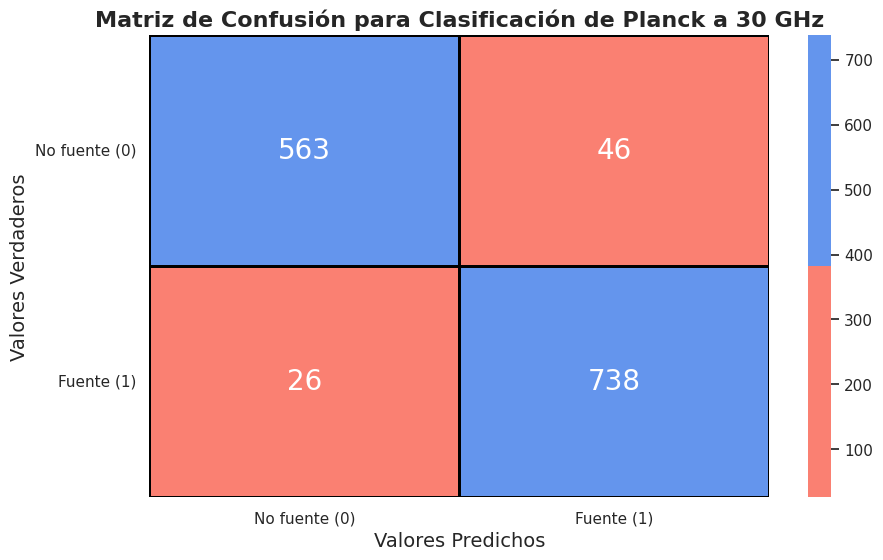

In [9]:


# Configuración de estilo y fuente
sns.set(style="whitegrid", font='Arial')




# Calcular la matriz de confusión
matrix = confusion_matrix(data.true_value, data.pred_value)

palette = ['salmon', 'cornflowerblue']

# Crear el heatmap para la matriz de confusión
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico para mejor visualización
sns.heatmap(matrix, annot=True, fmt='d', cmap=palette, linewidths=2, linecolor='black', 
            annot_kws={"size": 20})  # Aumenta el tamaño de las anotaciones

# Añadir título y etiquetas con una fuente más formal y elegante
plt.title('Matriz de Confusión para Clasificación de Planck a 30 GHz', fontsize=16, fontweight='bold')
plt.xlabel('Valores Predichos', fontsize=14)
plt.ylabel('Valores Verdaderos', fontsize=14)

# Ajustar etiquetas de los ejes
plt.xticks([0.5, 1.5], ['No fuente (0)', 'Fuente (1)'], rotation=0)
plt.yticks([0.5, 1.5], ['No fuente (0)', 'Fuente (1)'], rotation=0)

# Mostrar el gráfico
plt.show()




## Curva ROC

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

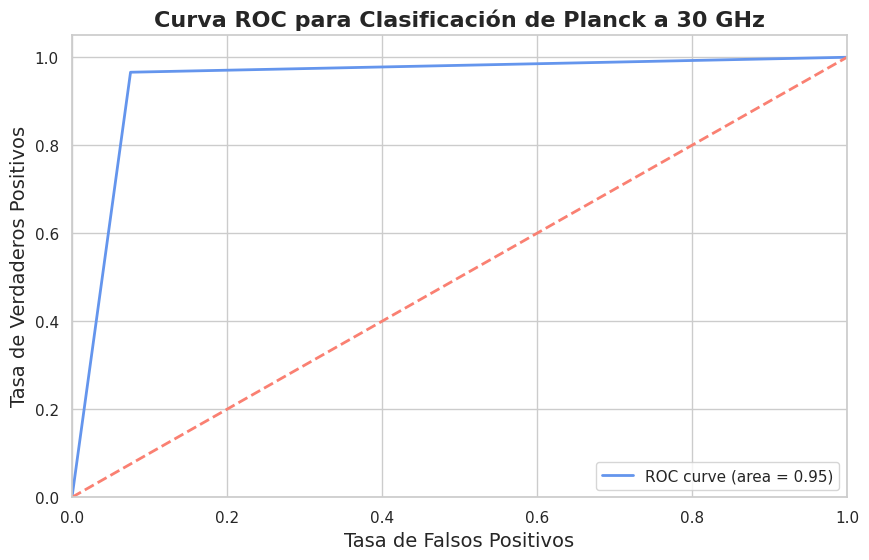

In [10]:

# Configuración de estilo y fuente
sns.set(style="whitegrid", font='Arial')

#Calculamoms el fpr a partir de data
counts = data['pred_type'].value_counts()
TP = counts.get('TP', 0)
FP = counts.get('FP', 0)
TN = counts.get('TN', 0)
FN = counts.get('FN', 0)

tpr = TP / (TP + FN) if (TP + FN) > 0 else 0  # Asegura no dividir entre cero
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0 

fpr, tpr, _ = roc_curve(data.true_value, data.pred_value)
roc_auc = auc(fpr, tpr)

# Crear la curva ROC
plt.figure(figsize=(10, 6))
sns.lineplot(x = fpr, y= tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=2, color='cornflowerblue')

# Añadir detalles al gráfico
plt.plot([0, 1], [0, 1], color='salmon', lw=2, linestyle='--')  # Línea de suerte
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC para Clasificación de Planck a 30 GHz', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()


# Análisis de la incertidumbre

## Distribución de incertidumbre por tipo de clasificación

En el siguiente gráfico se muestra como generalmente las predicciones erróneas tiene una mayor incertidumbre o std

/tmp/ipykernel_526/3731417629.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(
/tmp/ipykernel_526/3731417629.py:13: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  boxplot = sns.boxplot(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not

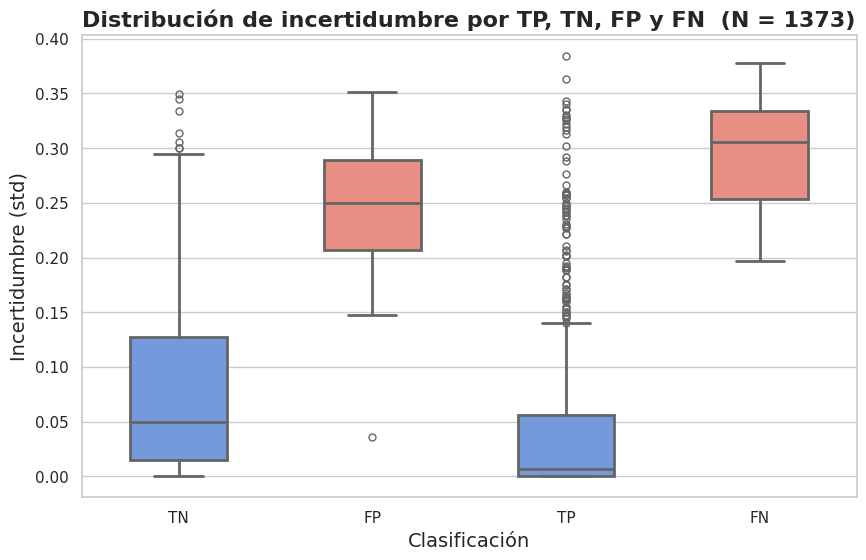

In [11]:


# Configuración de estilo y fuente
sns.set(style="whitegrid", font='Arial')

# Asignar nuevas etiquetas a las categorías


# Crear una paleta de colores específica
palette = ["salmon", "cornflowerblue"]
palette = ['cornflowerblue', 'salmon']

# Crear el boxplot
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico para mejor visualización
boxplot = sns.boxplot(
    x='pred_type',  # Utiliza la nueva columna con las etiquetas 'FN' y 'TP'
    y='std', 
    data=data, 
    palette=palette,
    width=0.5,  # Ajusta el ancho de las cajas para un mejor aspecto
    linewidth=2,  # Grosor de las líneas de las cajas para mejor visualización
    fliersize=5  # Tamaño de los puntos de los outliers
)

# Añadir título y etiquetas con una fuente más formal y elegante
plt.title('Distribución de incertidumbre por TP, TN, FP y FN  (N = 1373)', fontsize=16, fontweight='bold')
plt.xlabel('Clasificación', fontsize=14)
plt.ylabel('Incertidumbre (std)', fontsize=14)

# Mostrar el gráfico
plt.show()

## División de dataset para test estadístico

Para comprobar si la incertidumbre es mayor en las predicciones erróneas se realizará un test estadístico y así saber si se puede inferir está afirmación a toda la problación se debe dividir el dataset en predicciones correctas OK y predicciones erróneas KO

In [12]:
data['OK'] = np.where(data['true_value'] == data['pred_value'], 1, 0)

In [13]:
data_OK = data.loc[data.OK == 1] 
data_KO = data.loc[data.OK == 0]

## Test de normalidad

Primero se comprueba si la std sigue una distribución normal, lo que determinará que tipó de test se realizará más adelante

In [14]:
#Hacemos un test de normalidad de Lilliefors para la std

#Hacemos test de Liliefors para ver si la distribucion de std es normal


print(f'OKs : {kstest(data_OK["std"], "norm")}')

print(f'KOs : {kstest(data_KO["std"], "norm")}')

OKs : KstestResult(statistic=0.5000000296997288, pvalue=2.777947055608657e-301, statistic_location=7.444618e-08, statistic_sign=-1)
KOs : KstestResult(statistic=0.54468111538655, pvalue=1.492948471905853e-20, statistic_location=0.14734465, statistic_sign=-1)


## Test U de Mann-Whitney

Como la std no sigue una distribución normal se debe realizar una inferencia no parámetrica. Se ha optado por el Test U de Mann-Whitney para comprobar que las distribuciones de la std es diferente en los grupos OK y KO 

In [15]:

#Hacemos el test de Mann-Whitney para ver si hay diferencias significativas entre las distribuciones de la std
#H0 = las dos distribuciones son iguales
#H1 = las dos distribuciones son diferentes 
if mannwhitneyu(data_KO['std'],data_OK['std']).pvalue < 0.05:
    print('La distribucion de std es diferente en los dos grupos')
    if mannwhitneyu(data_KO['std'],data_OK['std']).pvalue < 0.01:
        print('La diferencia es muy significativa')

    if mannwhitneyu(data_KO['std'],data_OK['std']).pvalue < 0.001:
        print('La diferencia es extremadamente significativa')
        if (data_KO['std'].mean() > data_OK['std'].mean()):
            print('La media de std es mayor en el grupo de KO')
        else:
            print('La media de std es mayor en el grupo de OK')
else:
    print('La distribucion de std es igual en los dos grupos')


La distribucion de std es diferente en los dos grupos
La diferencia es muy significativa
La diferencia es extremadamente significativa
La media de std es mayor en el grupo de KO
